<a href="https://colab.research.google.com/github/Mohak91/Course-on-comparative-genomics-of-bacteria/blob/main/Lab_practical_session_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/comp_gen_bacteria_krea

/content/drive/MyDrive/comp_gen_bacteria_krea


In [3]:
!head /content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_genomic.fna

>NC_000908.2 Mycoplasma genitalium G37, complete sequence
TAAGTTATTATTTAGTTAATACTTTTAACAATATTATTAAGGTATTTAAAAAATACTATTATAGTATTTAACATAGTTAA
ATACCTTCCTTAATACTGTTAAATTATATTCAATCAATACATATATAATATTATTAAAATACTTGATAAGTATTATTTAG
ATATTAGACAAATACTAATTTTATATTGCTTTAATACTTAATAAATACTACTTATGTATTAAGTAAATATTACTGTAATA
CTAATAACAATATTATTACAATATGCTAGAATAATATTGCTAGTATCAATAATTACTAATATAGTATTAGGAAAATACCA
TAATAATATTTCTACATAATACTAAGTTAATACTATGTGTAGAATAATAAATAATCAGATTAAAAAAATTTTATTTATCT
GAAACATATTTAATCAATTGAACTGATTATTTTCAGCAGTAATAATTACATATGTACATAGTACATATGTAAAATATCAT
TAATTTCTGTTATATATAATAGTATCTATTTTAGAGAGTATTAATTATTACTATAATTAAGCATTTATGCTTAATTATAA
GCTTTTTATGAACAAAATTATAGACATTTTAGTTCTTATAATAAATAATAGATATTAAAGAAAATAAAAAAATAGAAATA
AATATCATAACCCTTGATAACCCAGAAATTAATACTTAATCAAAAATGAAAATATTAATTAATAAAAGTGAATTGAATAA


^ Caret symbol. Special character. the start of the line

$ Dollar. Special character. the end of the line

In [4]:
!grep "^>" /content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_genomic.fna

>NC_000908.2 Mycoplasma genitalium G37, complete sequence


###There is only one chromosome in this organism as there is just one info line.

##1. Gene length distribution

Gene annotation files: gff, gtf, gbff

We will make use of gff file. Each file has a format that can be exploited as per our use case.

In [5]:
!head -15 /content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_genomic.gff

##gff-version 3
#!gff-spec-version 1.21
#!processor NCBI annotwriter
#!genome-build ASM2732v1
#!genome-build-accession NCBI_Assembly:GCF_000027325.1
#!annotation-date 04/11/2022 13:19:11
#!annotation-source NCBI RefSeq 
##sequence-region NC_000908.2 1 580076
##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=243273
NC_000908.2	RefSeq	region	1	580076	.	+	.	ID=NC_000908.2:1..580076;Dbxref=ATCC:33530,taxon:243273;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;note=strain coidentity: G37 %3D ATCC 33530;old-name=Mycoplasma genitalium G-37;strain=G-37;type-material=type strain of Mycoplasma genitalium
NC_000908.2	RefSeq	gene	686	1828	.	+	.	ID=gene-MG_RS00005;Name=dnaN;gbkey=Gene;gene=dnaN;gene_biotype=protein_coding;locus_tag=MG_RS00005;old_locus_tag=MG_001
NC_000908.2	Protein Homology	CDS	686	1828	.	+	0	ID=cds-WP_009885562.1;Parent=gene-MG_RS00005;Dbxref=Genbank:WP_009885562.1;Name=WP_009885562.1;Ontology_term=GO:0006260,GO:0003887,GO:000

Algorithm to find gene length distribution:
1. Read in a gff file.
2. Note, lines starting with # are general information lines. For gene length calculation, we don't need them.
3. For all other non-# lines, they are spread across multiple columns. Each column is separated by the other using a tab (\t). That is the general format of any given gff file.
4. Note, all lines with third column as "gene" gives the information about a given gene.
5. Fourth and fifth column for any given row will give us the start and stop position of that gene in the entire genome. We can use these to calculate gene length.
6. 580076-1+1

(1828-686)+1

1828-685 = (1828-686)+1
7. We have to repeat the calculation in step 6 for all rows till the end of the file wherever the third column has the keyword "gene".
8. Save it in either a file as output or some data structure like lists. The latter will be useful if one wants to do some additional analysis on the list of gene lengths.

In [6]:
#making a global variable storing the name of the annotation file in gff format along with the entire path
GFF="/content/drive/MyDrive/comp_gen_bacteria_krea/GCF_000027325.1_ASM2732v1_genomic.gff"

In [7]:
#importing libraries that we would need in our code below
import statistics
import matplotlib.pyplot as plt

In [8]:
with open(GFF) as file_handle:
    for line in file_handle:
      print(line)

##gff-version 3

#!gff-spec-version 1.21

#!processor NCBI annotwriter

#!genome-build ASM2732v1

#!genome-build-accession NCBI_Assembly:GCF_000027325.1

#!annotation-date 04/11/2022 13:19:11

#!annotation-source NCBI RefSeq 

##sequence-region NC_000908.2 1 580076

##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=243273

NC_000908.2	RefSeq	region	1	580076	.	+	.	ID=NC_000908.2:1..580076;Dbxref=ATCC:33530,taxon:243273;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;note=strain coidentity: G37 %3D ATCC 33530;old-name=Mycoplasma genitalium G-37;strain=G-37;type-material=type strain of Mycoplasma genitalium

NC_000908.2	RefSeq	gene	686	1828	.	+	.	ID=gene-MG_RS00005;Name=dnaN;gbkey=Gene;gene=dnaN;gene_biotype=protein_coding;locus_tag=MG_RS00005;old_locus_tag=MG_001

NC_000908.2	Protein Homology	CDS	686	1828	.	+	0	ID=cds-WP_009885562.1;Parent=gene-MG_RS00005;Dbxref=Genbank:WP_009885562.1;Name=WP_009885562.1;Ontology_term=GO:0006260,GO:000

We don't want to analyse all lines. Let's use an if condition to not proceed ahead with lines starting with a #

In [9]:
with open(GFF) as file_handle:
    for line in file_handle:
      if not line.startswith("#"):
        print(line)

NC_000908.2	RefSeq	region	1	580076	.	+	.	ID=NC_000908.2:1..580076;Dbxref=ATCC:33530,taxon:243273;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;note=strain coidentity: G37 %3D ATCC 33530;old-name=Mycoplasma genitalium G-37;strain=G-37;type-material=type strain of Mycoplasma genitalium

NC_000908.2	RefSeq	gene	686	1828	.	+	.	ID=gene-MG_RS00005;Name=dnaN;gbkey=Gene;gene=dnaN;gene_biotype=protein_coding;locus_tag=MG_RS00005;old_locus_tag=MG_001

NC_000908.2	Protein Homology	CDS	686	1828	.	+	0	ID=cds-WP_009885562.1;Parent=gene-MG_RS00005;Dbxref=Genbank:WP_009885562.1;Name=WP_009885562.1;Ontology_term=GO:0006260,GO:0003887,GO:0009360;gbkey=CDS;gene=dnaN;go_component=DNA polymerase III complex|0009360||IEA;go_function=DNA-directed DNA polymerase activity|0003887||IEA;go_process=DNA replication|0006260||IEA;inference=COORDINATES: similar to AA sequence:RefSeq:WP_010874358.1;locus_tag=MG_RS00005;product=DNA polymerase III subunit beta;protein_id=WP_009885562.1

Remember, gff file is tab delimited. For each row we can split it into a list on the basis of a tab. In coding a tab is represented as \t. Like \n that is new line that we discussed in last session.

In [10]:
with open(GFF) as file_handle:
    for line in file_handle:
      if not line.startswith("#"):
        line_list=line.strip().split("\t")
        print(line_list)

['NC_000908.2', 'RefSeq', 'region', '1', '580076', '.', '+', '.', 'ID=NC_000908.2:1..580076;Dbxref=ATCC:33530,taxon:243273;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;note=strain coidentity: G37 %3D ATCC 33530;old-name=Mycoplasma genitalium G-37;strain=G-37;type-material=type strain of Mycoplasma genitalium']
['NC_000908.2', 'RefSeq', 'gene', '686', '1828', '.', '+', '.', 'ID=gene-MG_RS00005;Name=dnaN;gbkey=Gene;gene=dnaN;gene_biotype=protein_coding;locus_tag=MG_RS00005;old_locus_tag=MG_001']
['NC_000908.2', 'Protein Homology', 'CDS', '686', '1828', '.', '+', '0', 'ID=cds-WP_009885562.1;Parent=gene-MG_RS00005;Dbxref=Genbank:WP_009885562.1;Name=WP_009885562.1;Ontology_term=GO:0006260,GO:0003887,GO:0009360;gbkey=CDS;gene=dnaN;go_component=DNA polymerase III complex|0009360||IEA;go_function=DNA-directed DNA polymerase activity|0003887||IEA;go_process=DNA replication|0006260||IEA;inference=COORDINATES: similar to AA sequence:RefSeq:WP_010874358.1;locus_

Now, we are only interested in lines where the third column has the keyword "gene".

In [11]:
with open(GFF) as file_handle:
    for line in file_handle:
      if not line.startswith("#"):
        line_list=line.strip().split("\t")
        is_gene = line_list[2]
        if is_gene=="gene":
          print(line_list)

['NC_000908.2', 'RefSeq', 'gene', '686', '1828', '.', '+', '.', 'ID=gene-MG_RS00005;Name=dnaN;gbkey=Gene;gene=dnaN;gene_biotype=protein_coding;locus_tag=MG_RS00005;old_locus_tag=MG_001']
['NC_000908.2', 'RefSeq', 'gene', '1828', '2760', '.', '+', '.', 'ID=gene-MG_RS00010;Name=MG_RS00010;gbkey=Gene;gene_biotype=protein_coding;locus_tag=MG_RS00010;old_locus_tag=MG_002']
['NC_000908.2', 'RefSeq', 'gene', '2845', '4797', '.', '+', '.', 'ID=gene-MG_RS00015;Name=gyrB;gbkey=Gene;gene=gyrB;gene_biotype=protein_coding;locus_tag=MG_RS00015;old_locus_tag=MG_003']
['NC_000908.2', 'RefSeq', 'gene', '4812', '7322', '.', '+', '.', 'ID=gene-MG_RS00020;Name=gyrA;gbkey=Gene;gene=gyrA;gene_biotype=protein_coding;locus_tag=MG_RS00020;old_locus_tag=MG_004']
['NC_000908.2', 'RefSeq', 'gene', '7294', '8547', '.', '+', '.', 'ID=gene-MG_RS00025;Name=serS;gbkey=Gene;gene=serS;gene_biotype=protein_coding;locus_tag=MG_RS00025;old_locus_tag=MG_005']
['NC_000908.2', 'RefSeq', 'gene', '8551', '9183', '.', '+', '.', 

Let's calculate the length of the gene using fourth and the fifth columns

In [12]:
with open(GFF) as file_handle:
    for line in file_handle:
      if not line.startswith("#"):
        line_list=line.strip().split("\t")
        is_gene = line_list[2]
        if is_gene=="gene":
          #print(line_list)
          gene_length=int(line_list[4]) - int(line_list[3]) + 1
          print(gene_length)

1143
933
1953
2511
1254
633
765
1329
789
657
864
864
822
76
77
1872
1770
3096
1170
927
1539
438
867
1104
897
573
456
606
561
621
4356
2001
777
642
1245
1671
1350
1527
1155
1776
267
1680
858
855
1452
948
1152
258
1341
717
672
1266
393
1653
951
372
147
384
834
537
999
438
894
1704
89
2043
912
204
3996
1401
1947
1551
1425
327
1005
273
2727
855
2625
2421
1971
414
3075
417
1179
1131
1209
2547
414
681
570
873
936
1149
420
468
2067
627
483
315
453
1407
1197
1953
732
1434
1434
1434
669
948
843
234
2178
603
651
630
783
1164
837
1296
630
1371
666
474
756
645
1023
1695
1563
921
2130
1416
309
858
1044
438
780
354
1455
282
426
795
303
843
1473
1197
1797
1710
405
501
1518
2916
109
3342
1596
273
1860
339
840
810
1275
1128
1230
846
465
321
774
636
321
858
264
435
807
417
603
258
369
327
543
186
426
555
348
636
453
1428
645
747
213
114
375
366
987
372
825
915
1263
735
1824
954
2106
753
1758
990
957
159
957
4335
3153
168
276
1026
2421
546
180
375
708
1380
654
369
74
1902
2346
1032
1794
492
591
927
546
6

Let's store all the gene lengths in a list

In [14]:
gene_length_list=[]
with open(GFF) as file_handle:
    for line in file_handle:
      if not line.startswith("#"):
        line_list=line.strip().split("\t")
        is_gene = line_list[2]
        if is_gene=="gene":
          #print(line_list)
          gene_length=int(line_list[4]) - int(line_list[3]) + 1
          gene_length_list.append(gene_length)
        else:
          pass
print(gene_length_list)

[1143, 933, 1953, 2511, 1254, 633, 765, 1329, 789, 657, 864, 864, 822, 76, 77, 1872, 1770, 3096, 1170, 927, 1539, 438, 867, 1104, 897, 573, 456, 606, 561, 621, 4356, 2001, 777, 642, 1245, 1671, 1350, 1527, 1155, 1776, 267, 1680, 858, 855, 1452, 948, 1152, 258, 1341, 717, 672, 1266, 393, 1653, 951, 372, 147, 384, 834, 537, 999, 438, 894, 1704, 89, 2043, 912, 204, 3996, 1401, 1947, 1551, 1425, 327, 1005, 273, 2727, 855, 2625, 2421, 1971, 414, 3075, 417, 1179, 1131, 1209, 2547, 414, 681, 570, 873, 936, 1149, 420, 468, 2067, 627, 483, 315, 453, 1407, 1197, 1953, 732, 1434, 1434, 1434, 669, 948, 843, 234, 2178, 603, 651, 630, 783, 1164, 837, 1296, 630, 1371, 666, 474, 756, 645, 1023, 1695, 1563, 921, 2130, 1416, 309, 858, 1044, 438, 780, 354, 1455, 282, 426, 795, 303, 843, 1473, 1197, 1797, 1710, 405, 501, 1518, 2916, 109, 3342, 1596, 273, 1860, 339, 840, 810, 1275, 1128, 1230, 846, 465, 321, 774, 636, 321, 858, 264, 435, 807, 417, 603, 258, 369, 327, 543, 186, 426, 555, 348, 636, 453, 1428

Great so this works!!

Let's package the above final code in a function for reusability sakes.

In [15]:
#function definition
def read_gff_list(gff_file):
  """This line reads in gff file.
  Only reads lines not starting with the hash.
  Splits each line on the basis of a tab-delimiter.
  Then only for those lines where the third column has the keyword "gene",
  it subtracts the start position from the stop position of each gene,
  to get the gene length. Since gff is one based, we add one again in the end,
  to get the actual length of the gene. 
  Finally you append all gene lengths into a list and return that list.
  """
  gene_length_list=[]
  with open(gff_file) as file_handle:
    for line in file_handle:
      if not line.startswith("#"):
        line_list=line.strip().split("\t")
        is_gene = line_list[2]
        if is_gene=="gene":
          #print(line_list)
          gene_length=int(line_list[4]) - int(line_list[3]) + 1
          gene_length_list.append(gene_length)
        else:
          pass
  return gene_length_list

In [16]:
#function call
gene_length_list = read_gff_list(GFF)
print(gene_length_list)

[1143, 933, 1953, 2511, 1254, 633, 765, 1329, 789, 657, 864, 864, 822, 76, 77, 1872, 1770, 3096, 1170, 927, 1539, 438, 867, 1104, 897, 573, 456, 606, 561, 621, 4356, 2001, 777, 642, 1245, 1671, 1350, 1527, 1155, 1776, 267, 1680, 858, 855, 1452, 948, 1152, 258, 1341, 717, 672, 1266, 393, 1653, 951, 372, 147, 384, 834, 537, 999, 438, 894, 1704, 89, 2043, 912, 204, 3996, 1401, 1947, 1551, 1425, 327, 1005, 273, 2727, 855, 2625, 2421, 1971, 414, 3075, 417, 1179, 1131, 1209, 2547, 414, 681, 570, 873, 936, 1149, 420, 468, 2067, 627, 483, 315, 453, 1407, 1197, 1953, 732, 1434, 1434, 1434, 669, 948, 843, 234, 2178, 603, 651, 630, 783, 1164, 837, 1296, 630, 1371, 666, 474, 756, 645, 1023, 1695, 1563, 921, 2130, 1416, 309, 858, 1044, 438, 780, 354, 1455, 282, 426, 795, 303, 843, 1473, 1197, 1797, 1710, 405, 501, 1518, 2916, 109, 3342, 1596, 273, 1860, 339, 840, 810, 1275, 1128, 1230, 846, 465, 321, 774, 636, 321, 858, 264, 435, 807, 417, 603, 258, 369, 327, 543, 186, 426, 555, 348, 636, 453, 1428

Let's calculate summary statistics for the above list. Let's directly make a function this time.

In [17]:
#function definition
def calculate_gene_length_summary(gene_length_list):
  """Takes in a list as an argument and using the library statistics,
  it calculates mean, median and mode. And returns all three values"""
  mean=statistics.mean(gene_length_list)
  median=statistics.median(gene_length_list)
  mode=statistics.mode(gene_length_list)
  return mean, median, mode

In [18]:
#function call
mean, median, mode = calculate_gene_length_summary(gene_length_list)
print("Mean: %f\nMedian: %f\nMode: %f\n"%(mean,median,mode))

Mean: 1003.794495
Median: 840.000000
Mode: 77.000000



Let's plot all the elements of our list of gene lengths.

In [19]:
#function definition
def plot_histogram(gene_length_list):
  #takes in a list of values and plots a histogram
  plt.hist(gene_length_list) #histogram method of the package/module/library matplotlib.pyplot
  plt.show()

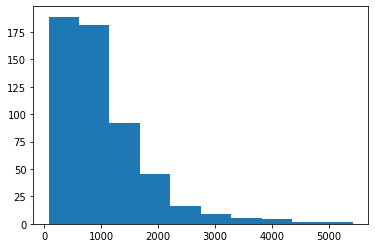

In [20]:
#function call
plot_histogram(gene_length_list)

Let's put the entire code so far together. Function definitions in one cell and function calls in separate cells.

In [21]:
#function definitions
def read_gff_list(gff_file):
  """This line reads in gff file.
  Only reads lines not starting with the hash.
  Splits each line on the basis of a tab-delimiter.
  Then only for those lines where the third column has the keyword "gene",
  it subtracts the start position from the stop position of each gene,
  to get the gene length. Since gff is one based, we add one again in the end,
  to get the actual length of the gene. 
  Finally you append all gene lengths into a list and return that list.
  """
  gene_length_list=[]
  with open(gff_file) as file_handle:
    for line in file_handle:
      if not line.startswith("#"):
        line_list=line.strip().split("\t")
        is_gene = line_list[2]
        if is_gene=="gene":
          #print(line_list)
          gene_length=int(line_list[4]) - int(line_list[3]) + 1
          gene_length_list.append(gene_length)
        else:
          pass
  return gene_length_list

def calculate_gene_length_summary(gene_length_list):
  """Takes in a list as an argument and using the library statistics,
  it calculates mean, median and mode. And returns all three values"""
  mean=statistics.mean(gene_length_list)
  median=statistics.median(gene_length_list)
  mode=statistics.mode(gene_length_list)
  return mean, median, mode

def plot_histogram(gene_length_list):
  #takes in a list of values and plots a histogram
  plt.hist(gene_length_list) #histogram method of the package/module/library matplotlib.pyplot
  plt.show()

In [22]:
#function calls

gene_length_list = read_gff_list(GFF)
print(gene_length_list)

mean, median, mode = calculate_gene_length_summary(gene_length_list)
print("Mean: %f\nMedian: %f\nMode: %f\n"%(mean,median,mode))

[1143, 933, 1953, 2511, 1254, 633, 765, 1329, 789, 657, 864, 864, 822, 76, 77, 1872, 1770, 3096, 1170, 927, 1539, 438, 867, 1104, 897, 573, 456, 606, 561, 621, 4356, 2001, 777, 642, 1245, 1671, 1350, 1527, 1155, 1776, 267, 1680, 858, 855, 1452, 948, 1152, 258, 1341, 717, 672, 1266, 393, 1653, 951, 372, 147, 384, 834, 537, 999, 438, 894, 1704, 89, 2043, 912, 204, 3996, 1401, 1947, 1551, 1425, 327, 1005, 273, 2727, 855, 2625, 2421, 1971, 414, 3075, 417, 1179, 1131, 1209, 2547, 414, 681, 570, 873, 936, 1149, 420, 468, 2067, 627, 483, 315, 453, 1407, 1197, 1953, 732, 1434, 1434, 1434, 669, 948, 843, 234, 2178, 603, 651, 630, 783, 1164, 837, 1296, 630, 1371, 666, 474, 756, 645, 1023, 1695, 1563, 921, 2130, 1416, 309, 858, 1044, 438, 780, 354, 1455, 282, 426, 795, 303, 843, 1473, 1197, 1797, 1710, 405, 501, 1518, 2916, 109, 3342, 1596, 273, 1860, 339, 840, 810, 1275, 1128, 1230, 846, 465, 321, 774, 636, 321, 858, 264, 435, 807, 417, 603, 258, 369, 327, 543, 186, 426, 555, 348, 636, 453, 1428

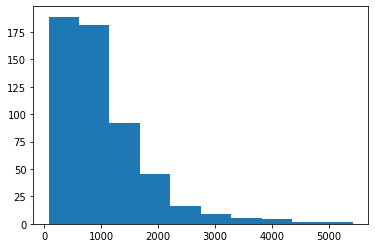

In [23]:
plot_histogram(gene_length_list)

In [24]:
#Let's calculate number of genes in this organisms as well.
gene_number = len(gene_length_list)
print("Number of genes: %f\n"%gene_number)

Number of genes: 545.000000



Does this reconcile with what we discussed in the class?

From NCBI, download 5 or more gff files from other bacteria (pathogenic, non-pathogenic, free living, obligate symbionts etc.) and try to see how much the mean, median, mode and distribution changes for gene lengths in each of those organisms (same as above). For example, gff file of Escherichia coli, Mycobacterium tuberculosis etc.

Maybe plot a distribution of mean gene lengths across all these organisms that you choose to take? (Hint: You just need to pass a list of mean gene lengths across all organisms that you wish to include in your analysis into the plot_histogram function that we created above.)